## Imports and path

In [ ]:
import os
import sys
import pandas as pd
from PIL import ImageDraw, ImageFont

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../../')))


try:
    from deli.analysis.gnn import Final_Network, smi_to_pyg
    print("Successfully imported gnn.")
except ModuleNotFoundError as e:
    print("Error importing gnn:", e)
    
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


try:
    from deli.analysis.cube_class import DELi_Cube
    print("Successfully imported cube_class.")
except ModuleNotFoundError as e:
    print("Error importing cube_class:", e)

try:
    import deli.analysis.analysis_report_gen as report
    print("Successfully imported analysis_report_gen.")
except ModuleNotFoundError as e:
    print("Error importing analysis_report_gen:", e)


Error importing gnn: No module named 'deli'
Error importing cube_class: No module named 'deli'
Error importing analysis_report_gen: No module named 'deli'


## Pull in data (or example data)

In [3]:
# Step 2: Data Loading (Allow users to load their data)
data_file = "../example_data/DEL003_cube_noid.csv"  # Replace with your data
df = pd.read_csv(data_file)
display(df.head())


,DEL_ID,raw_PTMODD3index1,corrected_PTMODD3index1,raw_PTMODD3index2,corrected_PTMODD3index2,raw_PTMODD3index3,corrected_PTMODD3index3,raw_PTMODD3index4,corrected_PTMODD3index4,raw_PTMODD3index5,...,BC_raw_D3index7,BC_raw_D3index8,BC_corrected_PTMODD3index1,BC_corrected_PTMODD3index2,BC_corrected_PTMODD3index3,BC_corrected_PTMODD3index4,BC_corrected_PTMODD3index5,BC_corrected_PTMODD3index6,BC_corrected_D3index7,BC_corrected_D3index8
0,A023-B017-C027,14,14,8,8,17,17,6,4,7,...,313,135,480,229,421,111,157,110,292,20
1,A022-B035-C032,33,32,13,13,31,31,2,2,14,...,728,318,718,324,688,167,259,225,676,52
2,A029-B039-C014,23,23,11,11,18,18,23,11,11,...,457,180,809,359,720,128,243,161,437,43
3,A017-B020-C032,44,44,17,17,31,31,15,5,21,...,848,483,1109,493,950,224,367,266,791,70
4,A017-B015-C041,49,49,22,22,37,37,12,8,28,...,836,509,1097,567,1019,201,366,341,785,68


## Set constants and obtain metrics/check for patterns with ML

,DEL_ID,ID_A,ID_B,ID_C,raw_PTMODD3index1,corrected_PTMODD3index1,raw_PTMODD3index2,corrected_PTMODD3index2,raw_PTMODD3index3,corrected_PTMODD3index3,...,BC_raw_D3index7,BC_raw_D3index8,BC_corrected_PTMODD3index1,BC_corrected_PTMODD3index2,BC_corrected_PTMODD3index3,BC_corrected_PTMODD3index4,BC_corrected_PTMODD3index5,BC_corrected_PTMODD3index6,BC_corrected_D3index7,BC_corrected_D3index8
0,A023-B017-C027,A023,B017,C027,14,14,8,8,17,17,...,313,135,480,229,421,111,157,110,292,20
1,A022-B035-C032,A022,B035,C032,33,32,13,13,31,31,...,728,318,718,324,688,167,259,225,676,52
2,A029-B039-C014,A029,B039,C014,23,23,11,11,18,18,...,457,180,809,359,720,128,243,161,437,43
3,A017-B020-C032,A017,B020,C032,44,44,17,17,31,31,...,848,483,1109,493,950,224,367,266,791,70
4,A017-B015-C041,A017,B015,C041,49,49,22,22,37,37,...,836,509,1097,567,1019,201,366,341,785,68


{'Cycle1': ['corrected_PTMODD3index4',
  'corrected_PTMODD3index5',
  'corrected_PTMODD3index6'],
 'Cycle2': ['corrected_PTMODD3index1',
  'corrected_PTMODD3index2',
  'corrected_PTMODD3index3']}

{'Cycle1': ['corrected_D3index7'], 'Cycle2': ['corrected_D3index8']}

58000

{'Cycle1': ['raw_PTMODD3index4', 'raw_PTMODD3index5', 'raw_PTMODD3index6'],
 'Cycle2': ['raw_PTMODD3index1', 'raw_PTMODD3index2', 'raw_PTMODD3index3']}

{'Cycle1_NSC_max': 5.58, 'Cycle2_NSC_max': 3.66}

{'Cycle1_SD_min': 1.7921146953405018, 'Cycle2_SD_min': 2.73224043715847}

{'Cycle1_sampling_depth': 27.60896551724138,
 'Cycle2_sampling_depth': 40.981206896551726}

,DEL_ID,ID_A,ID_B,ID_C,raw_PTMODD3index1,corrected_PTMODD3index1,raw_PTMODD3index2,corrected_PTMODD3index2,raw_PTMODD3index3,corrected_PTMODD3index3,...,Cycle1_C,Cycle1_E,Cycle1_sigma,Cycle1_z_score,Cycle1_norm_z_score,Cycle2_C,Cycle2_E,Cycle2_sigma,Cycle2_z_score,Cycle2_norm_z_score
0,A023-B017-C027,A023,B017,C027,14,14,8,8,17,17,...,9,7,2.645738,0.755933,0.000911,39,1,0.999991,38.000333,0.159151
1,A022-B035-C032,A022,B035,C032,33,32,13,13,31,31,...,19,51,7.141164,-4.481062,-0.005401,76,2,1.414189,52.326820,0.219152
2,A029-B039-C014,A029,B039,C014,23,23,11,11,18,18,...,21,20,4.472071,0.223610,0.000270,52,2,1.414189,35.355959,0.148076
3,A017-B020-C032,A017,B020,C032,44,44,17,17,31,31,...,18,37,6.082599,-3.123665,-0.003765,92,2,1.414189,63.640727,0.266536
4,A017-B015-C041,A017,B015,C041,49,49,22,22,37,37,...,33,33,5.744425,0.000000,0.000000,108,9,2.999763,33.002605,0.138219


Calculating total reads and sampling depth per experiment...


Experiments: 100%|██████████| 2/2 [00:00<00:00, 188.20it/s]


Total reads for Cycle1: 1601320
Sampling depth for Cycle1: 27.60896551724138
Total reads for Cycle2: 2376910
Sampling depth for Cycle2: 40.981206896551726
Computing Poisson probabilities per row, per experiment...


Experiments (Poisson): 100%|██████████| 2/2 [00:04<00:00,  2.09s/it]


Calculating product for all matching features...


Calculating Products per Disynthon:   0%|          | 0/2 [00:00<?, ?it/s]/Users/brandonnovy/anaconda3/envs/deli/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/brandonnovy/anaconda3/envs/deli/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
Calculating Products per Disynthon:  50%|█████     | 1/2 [00:00<00:00,  4.95it/s]/Users/brandonnovy/anaconda3/envs/deli/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/brandonnovy/anaconda3/envs/deli/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/brandonnovy/anaconda3/envs/deli

Calculating PolyObase scores using Eq. 9...
Calculating PolyO score for each disynthon...


/Users/brandonnovy/Desktop/deli_repo/DELi/src/deli/analysis/cube_class.py:602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotfire_df.rename(columns={column: f'{exp_name}_{column}'}, inplace=True)
/Users/brandonnovy/Desktop/deli_repo/DELi/src/deli/analysis/cube_class.py:603: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotfire_df[f'{exp_name}_avg'] = df[index_range].mean(axis=1).round(2)
/Users/brandonnovy/Desktop/deli_repo/DELi/src/deli/analysis/cube_class.py:602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

,DEL_ID,AB,AC,BC,ID_A,ID_B,ID_C,raw_PTMODD3index1,Cycle2_corrected_PTMODD3index1,raw_PTMODD3index2,...,Cycle1_z_score_log,Cycle2_z_score_log,AB_Cycle1_PolyO_score,AB_Cycle2_PolyO_score,BC_Cycle1_PolyO_score,BC_Cycle2_PolyO_score,AC_Cycle1_PolyO_score,AC_Cycle2_PolyO_score,Cycle1_avg,Cycle2_avg
0,A023-B017-C027,A023-B017,A023-C027,B017-C027,A023,B017,C027,14,14,8,...,-1.24,4.86,1.69,0.94,1.49,0.82,2.32,1.15,3.00,13.00
1,A022-B035-C032,A022-B035,A022-C032,B035-C032,A022,B035,C032,33,32,13,...,-0.45,6.93,0.88,1.19,0.97,1.57,1.27,1.70,6.33,25.33
2,A029-B039-C014,A029-B039,A029-C014,B039-C014,A029,B039,C014,23,23,11,...,-0.33,5.74,1.27,0.70,1.09,1.47,1.37,1.18,7.00,17.33
3,A017-B020-C032,A017-B020,A017-C032,B020-C032,A017,B020,C032,44,44,17,...,-0.51,7.53,0.66,2.51,0.66,2.99,1.00,2.24,6.00,30.67
4,A017-B015-C041,A017-B015,A017-C041,B015-C041,A017,B015,C041,49,49,22,...,0.20,8.04,0.63,inf,0.72,inf,1.01,2.18,11.00,36.00


Plot saved to my_plots/top_AB_disynthons_Cycle2 vs Cycle1.png
Plot saved to my_plots/top_BC_disynthons_Cycle2 vs Cycle1.png
Plot saved to my_plots/top_AC_disynthons_Cycle2 vs Cycle1.png


  0%|          | 0/100 [00:00<?, ?it/s][01:42:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[01:42:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[01:42:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[01:42:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[01:42:27] Explicit valence for atom # 1 N, 4, is greater than permitted
[01:42:27] Explicit valence for atom # 29 N, 4, is greater than permitted
  0%|          | 0/100 [00:00<?, ?it/s][01:42:29] Explicit valence for atom # 31 N, 4, is greater than permitted
[01:42:29] Explicit valence for atom # 23 N, 4, is greater than permitted
[01:42:29] Explicit valence for atom # 25 N, 4, is greater than permitted
[01:42:29] Explicit valence for atom # 1 N, 4, is greater than permitted
  0%|          | 0/200 [00:00<?, ?it/s][01:42:30] Explicit valence for atom # 1 N, 4, is greater than permitted
[01:42:30] Explicit valence for atom # 1 N, 4, is greater than permitted
[01

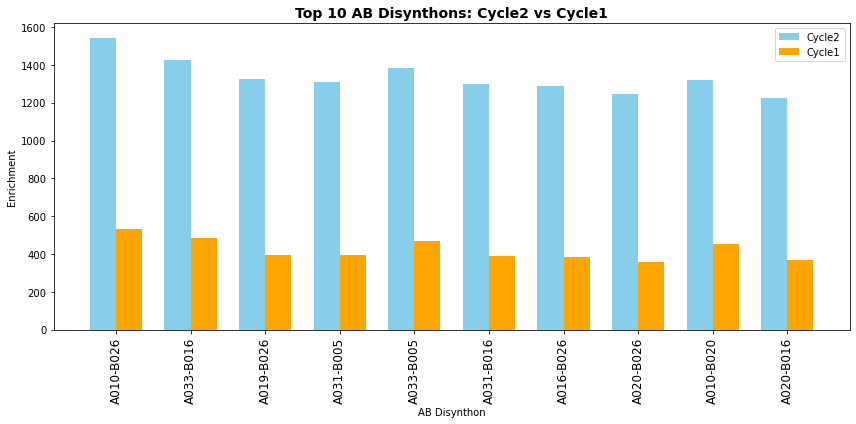

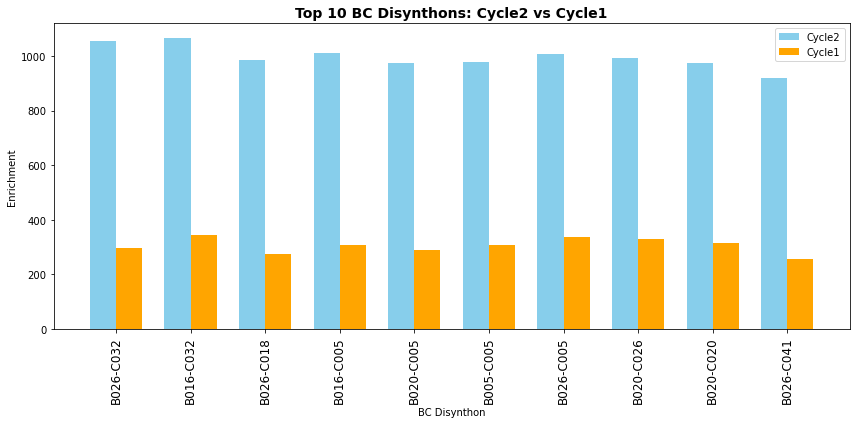

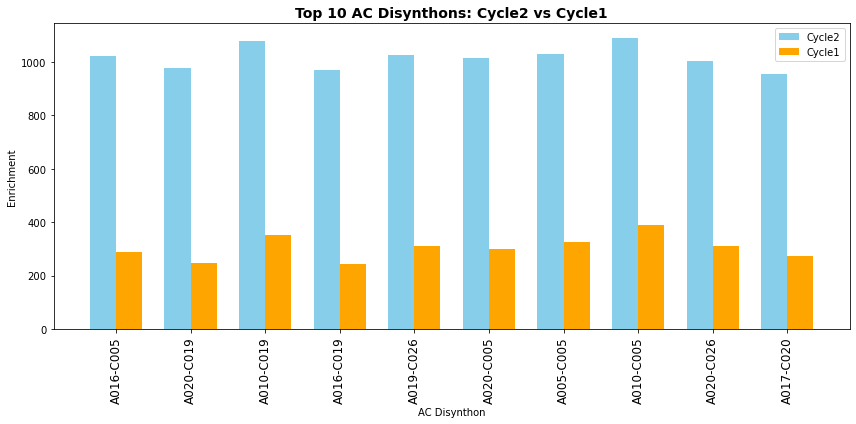

In [4]:
# Step 3: Define Parameters (Users can manually define or modify these)
id_col = df.columns[0]  # Default to first column if not specified by user
indexes = {
    "Cycle1": ["corrected_PTMODD3index4", "corrected_PTMODD3index5", "corrected_PTMODD3index6"],
    "Cycle2": ["corrected_PTMODD3index1", "corrected_PTMODD3index2", "corrected_PTMODD3index3"]
}
control_cols = {
    "Cycle1": ["corrected_D3index7"],
    "Cycle2": ["corrected_D3index8"]
}
raw_indexes = {
    "Cycle1": ["raw_PTMODD3index4", "raw_PTMODD3index5", "raw_PTMODD3index6"],
    "Cycle2": ["raw_PTMODD3index1", "raw_PTMODD3index2", "raw_PTMODD3index3"]
}
lib_size = 58000  # Change to lib size of your data

# Step 4: Initialize the DELi_Cube class
cube = DELi_Cube(df, id_col, indexes, control_cols, lib_size, raw_indexes)
display(cube.data.head())
display(cube.indexes)
display(cube.control_cols)
display(cube.lib_size)
display(cube.raw_indexes)

# Step 5: Perform Analysis
# 1. SD_min Method: This performs SD_min analysis to get NSC max, SD min threshold, and sampling depth for the data.
nsc_max_dict, sd_min_dict, sampling_depth_dict = cube.SD_min()
display(nsc_max_dict)
display(sd_min_dict)
display(sampling_depth_dict)

# 2. NSC_values Method: This calculates and stores the Normalized sequence count values for each compound.
cube.NSC_values()

# 3. Maximum Likelihood Enrichment Ratio: This computes the maximum likelihood enrichment ratio for the data.
cube.maximum_likelihood_enrichment_ratio()

# 4. Z_score Method: This standardizes the data by calculating normalized Z-scores.
cube.z_score()
display(cube.data.head())

# 5. z_score_log_data Method: This obtains a normalized z score on log transformed data.
cube.z_score_log_data()


# 6. Disynthonize Method: This breaks the data down into disynthons, which is useful for identifying key motifs.
disynthon_data, disynth_exp_dict = cube.disynthonize()
cube.data = disynthon_data  # Updates cube data with disynthonized data

# 7. PolyO score
cube.PolyO(feature_mode='disynthon')


simplified_cube = cube.simple_spotfire_version()
display(simplified_cube.head())

# 7. Get Top Disynthons: This retrieves the top disynthons based on the comparison of two experiments or just using one experiment.
#often useful for inibitor experiments or to identify compounds against a control
top_disynthons_dir = "my_plots"  # Define where the top disynthons should be saved
if not os.path.exists(top_disynthons_dir):
    os.makedirs(top_disynthons_dir)

cube.get_top_disynthons(
    disynthon_data=disynthon_data,
    exp_name1='Cycle2',  # Define the experiment names for comparison
    comparison_type='exp2',
    exp_name2='Cycle1',  # Define control type for comparison
    top_count=10,
    output_dir=top_disynthons_dir
)

cube.ml_fingerprints_to_RF(output_dir="my_plots")

cube.ml_fingerprints_to_classifier(threshold= 10, output_dir="my_plots")

#adds about 3 min of time for training on local laptop
# cube.gnn_classifier(threshold=10, output_dir="my_plots", arch="GAT")




### Perform background subtraction normalization (best to do after metrics calc as some methods rely on comparing distribution of data to control)

In [5]:
#normalize method which background subtracts the NTC from the relevant columns
display(cube.data.head(10))
cube.normalize()
simplified_cube_normalized = cube.simple_spotfire_version()
display(simplified_cube_normalized.head(10))

,DEL_ID,AB,AC,BC,ID_A,ID_B,ID_C,raw_PTMODD3index1,corrected_PTMODD3index1,raw_PTMODD3index2,...,PolyObase_BC,PolyObase_AC,AB_Cycle1_PolyO_score,AB_Cycle2_PolyO_score,BC_Cycle1_PolyO_score,BC_Cycle2_PolyO_score,AC_Cycle1_PolyO_score,AC_Cycle2_PolyO_score,Cycle1_average_enrichment,Cycle2_average_enrichment
0,A023-B017-C027,A023-B017,A023-C027,B017-C027,A023,B017,C027,14,14,8,...,92.82232,109.324066,1.687788,0.941455,1.489194,0.816455,2.317796,1.152705,3.000000,13.000000
1,A022-B035-C032,A022-B035,A022-C032,B035-C032,A022,B035,C032,33,32,13,...,92.82232,109.324066,0.881346,1.190653,0.972700,1.566319,1.268146,1.703883,6.333333,25.333333
2,A029-B039-C014,A029-B039,A029-C014,B039-C014,A029,B039,C014,23,23,11,...,92.82232,109.324066,1.266522,0.701864,1.088118,1.468090,1.368203,1.181661,7.000000,17.333333
3,A017-B020-C032,A017-B020,A017-C032,B020-C032,A017,B020,C032,44,44,17,...,92.82232,109.324066,0.663655,2.512271,0.661054,2.986773,0.996409,2.243879,6.000000,30.666667
4,A017-B015-C041,A017-B015,A017-C041,B015-C041,A017,B015,C041,49,49,22,...,92.82232,109.324066,0.627434,inf,0.722617,inf,1.007254,2.177120,11.000000,36.000000
5,A020-B016-C043,A020-B016,A020-C043,B016-C043,A020,B016,C043,37,37,12,...,92.82232,109.324066,0.628454,inf,0.827333,1.311996,1.730257,1.186741,6.666667,26.666667
6,A017-B027-C044,A017-B027,A017-C044,B027-C044,A017,B027,C044,23,21,11,...,92.82232,109.324066,0.779734,1.764412,1.654240,0.799436,1.416794,0.970130,3.000000,15.000000
7,A010-B016-C032,A010-B016,A010-C032,B016-C032,A010,B016,C032,62,62,29,...,92.82232,109.324066,0.775443,inf,0.868417,inf,0.884686,inf,14.333333,41.666667
8,A018-B038-C022,A018-B038,A018-C022,B038-C022,A018,B038,C022,23,23,7,...,92.82232,109.324066,0.953606,0.818070,1.153454,1.127947,0.840589,1.762776,8.333333,15.666667
9,A029-B005-C013,A029-B005,A029-C013,B005-C013,A029,B005,C013,41,41,14,...,92.82232,109.324066,0.705786,2.726789,0.817553,1.878771,1.735547,1.329441,8.666667,27.000000


Normalizing Cycle1 with columns: ['corrected_PTMODD3index4', 'corrected_PTMODD3index5', 'corrected_PTMODD3index6']
Normalizing Cycle2 with columns: ['corrected_PTMODD3index1', 'corrected_PTMODD3index2', 'corrected_PTMODD3index3']


/Users/brandonnovy/Desktop/deli_repo/DELi/src/deli/analysis/cube_class.py:602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotfire_df.rename(columns={column: f'{exp_name}_{column}'}, inplace=True)
/Users/brandonnovy/Desktop/deli_repo/DELi/src/deli/analysis/cube_class.py:603: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotfire_df[f'{exp_name}_avg'] = df[index_range].mean(axis=1).round(2)
/Users/brandonnovy/Desktop/deli_repo/DELi/src/deli/analysis/cube_class.py:602: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

,DEL_ID,AB,AC,BC,ID_A,ID_B,ID_C,raw_PTMODD3index1,Cycle2_corrected_PTMODD3index1,raw_PTMODD3index2,...,Cycle1_z_score_log,Cycle2_z_score_log,AB_Cycle1_PolyO_score,AB_Cycle2_PolyO_score,BC_Cycle1_PolyO_score,BC_Cycle2_PolyO_score,AC_Cycle1_PolyO_score,AC_Cycle2_PolyO_score,Cycle1_avg,Cycle2_avg
0,A023-B017-C027,A023-B017,A023-C027,B017-C027,A023,B017,C027,14,13,8,...,-1.24,4.86,1.69,0.94,1.49,0.82,2.32,1.15,0.0,12.00
1,A022-B035-C032,A022-B035,A022-C032,B035-C032,A022,B035,C032,33,32,13,...,-0.45,6.93,0.88,1.19,0.97,1.57,1.27,1.70,0.0,25.33
2,A029-B039-C014,A029-B039,A029-C014,B039-C014,A029,B039,C014,23,23,11,...,-0.33,5.74,1.27,0.70,1.09,1.47,1.37,1.18,0.0,17.33
3,A017-B020-C032,A017-B020,A017-C032,B020-C032,A017,B020,C032,44,44,17,...,-0.51,7.53,0.66,2.51,0.66,2.99,1.00,2.24,0.0,30.67
4,A017-B015-C041,A017-B015,A017-C041,B015-C041,A017,B015,C041,49,40,22,...,0.20,8.04,0.63,inf,0.72,inf,1.01,2.18,0.0,27.00
5,A020-B016-C043,A020-B016,A020-C043,B016-C043,A020,B016,C043,37,33,12,...,-0.39,7.09,0.63,inf,0.83,1.31,1.73,1.19,0.0,22.67
6,A017-B027-C044,A017-B027,A017-C044,B027-C044,A017,B027,C044,23,17,11,...,-1.24,5.29,0.78,1.76,1.65,0.80,1.42,0.97,0.0,11.00
7,A010-B016-C032,A010-B016,A010-C032,B016-C032,A010,B016,C032,62,42,29,...,0.53,8.51,0.78,inf,0.87,inf,0.88,inf,0.0,21.67
8,A018-B038-C022,A018-B038,A018-C022,B038-C022,A018,B038,C022,23,23,7,...,-0.13,5.43,0.95,0.82,1.15,1.13,0.84,1.76,0.0,15.67
9,A029-B005-C013,A029-B005,A029-C013,B005-C013,A029,B005,C013,41,40,14,...,-0.08,7.13,0.71,2.73,0.82,1.88,1.74,1.33,0.0,26.00


## 3D Interactive Visualization with Background Subtracted Data

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# In this case we can replace _norm_z_score with _avg for NTC subtracted data or any other metric
# we have calculated with DELi
def update_plot(threshold, exp_name):
   
    filtered_cube = simplified_cube_normalized[simplified_cube_normalized[exp_name + '_norm_z_score'] >= threshold]
    fig = px.scatter_3d(filtered_cube, x='ID_A', y='ID_B', z='ID_C', size=exp_name + '_norm_z_score', color=exp_name + '_norm_z_score', opacity=0.7, color_continuous_scale=px.colors.sequential.Viridis)
    fig.update_layout(title=f'3D Scatter Plot of {exp_name}_norm_z_score')
    fig.show()

threshold_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=simplified_cube_normalized[[exp_name + '_norm_z_score' for exp_name in indexes]].max().max(),
    step=0.1,
    description='Threshold:',
    continuous_update=False
)

exp_name_dropdown = widgets.Dropdown(
    options=list(indexes.keys()),
    value=list(indexes.keys())[0],
    description='Experiment:'
)

interactive_plot = widgets.interactive(update_plot, threshold=threshold_slider, exp_name=exp_name_dropdown)
display(threshold_slider, exp_name_dropdown, interactive_plot)

FloatSlider(value=0.0, continuous_update=False, description='Threshold:', max=0.59)

Dropdown(description='Experiment:', options=('Cycle1', 'Cycle2'), value='Cycle1')

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Threshold:', max=0.59), Dro…

Top 20 compounds for Cycle1 based on MLE


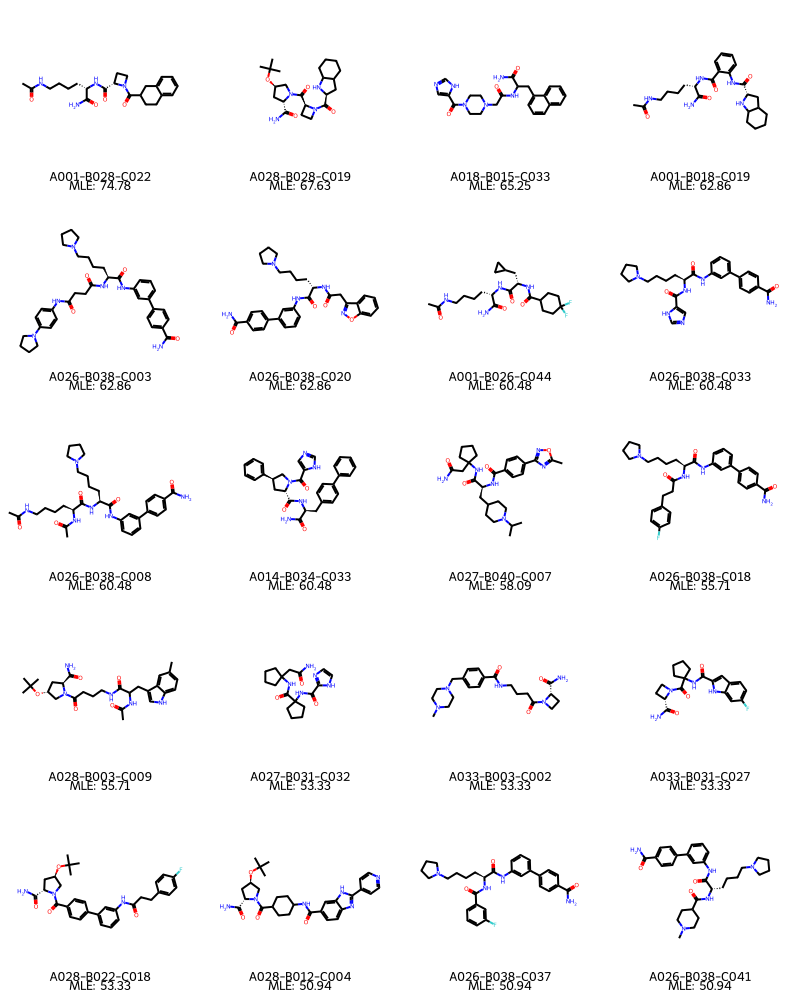

Top 20 compounds for Cycle2 based on MLE


[01:45:40] Explicit valence for atom # 23 N, 4, is greater than permitted


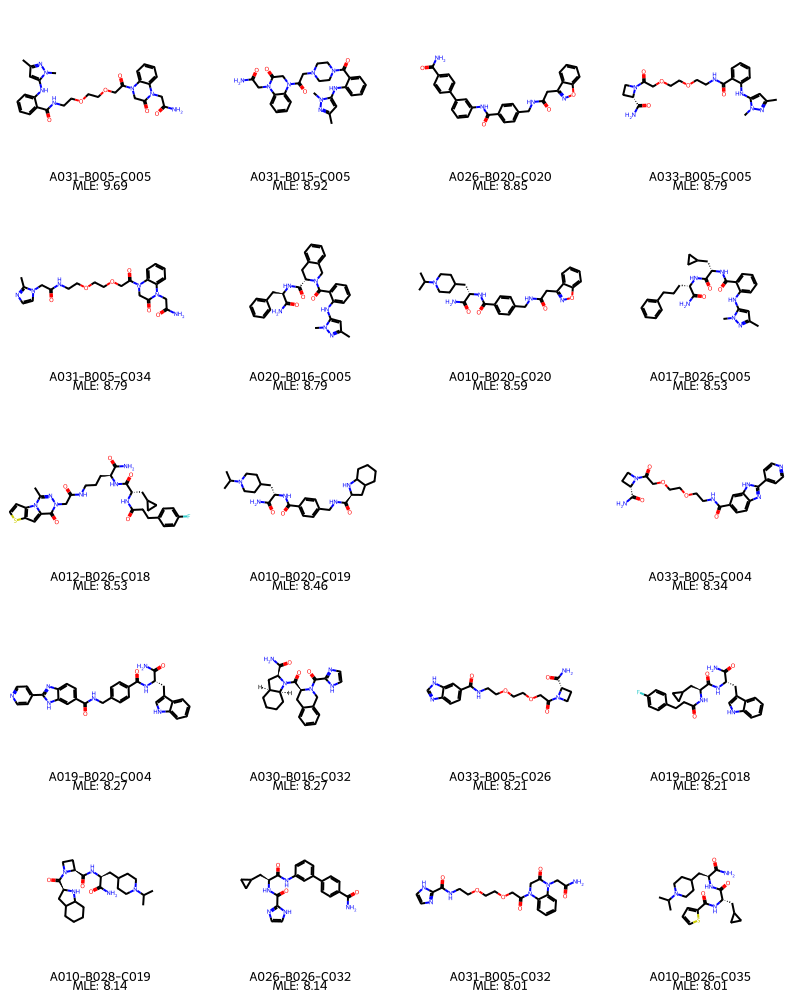

In [11]:

cube.top_n_compounds(n=20, metric="MLE", output_dir="my_plots")
